# Exploratory Data Analysis 

# Predicting Customer Response to Marketing Campaigns

**Abstract**: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information**: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv('dataset/bank-additional-full.csv.', sep = ';')

In [6]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.shape

(41188, 21)

In [8]:
df.isna().sum() / df.shape[0]

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [9]:
df.duplicated().any()

True

In [10]:
duplicates = df[df.duplicated()]
print(len(duplicates))

12


In [11]:
duplicates.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


In [12]:
dfc = df.drop_duplicates()

In [13]:
dfc.duplicated().any()

False

In [14]:
dfc.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


## Descriptive Statistics

In [15]:
numerical = [ 'age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [16]:
# Calculate the descriptive statistics
descriptive_stats = dfc[numerical].agg(['mean', 'median', 'std', 'min', 'max'])

# Display the results
print(descriptive_stats)

             age     duration   campaign  emp.var.rate  cons.price.idx  \
mean    40.02380   258.315815   2.567879      0.081922       93.575720   
median  38.00000   180.000000   2.000000      1.100000       93.749000   
std     10.42068   259.305321   2.770318      1.570883        0.578839   
min     17.00000     0.000000   1.000000     -3.400000       92.201000   
max     98.00000  4918.000000  56.000000      1.400000       94.767000   

        cons.conf.idx  euribor3m  nr.employed  
mean       -40.502863   3.621293  5167.034870  
median     -41.800000   4.857000  5191.000000  
std          4.627860   1.734437    72.251364  
min        -50.800000   0.634000  4963.600000  
max        -26.900000   5.045000  5228.100000  


## Univariate Analysis

In [17]:
custom_palette = sns.color_palette(["#1f77b4", "#d62728", "#2ecc71"])
sns.set_palette(custom_palette)

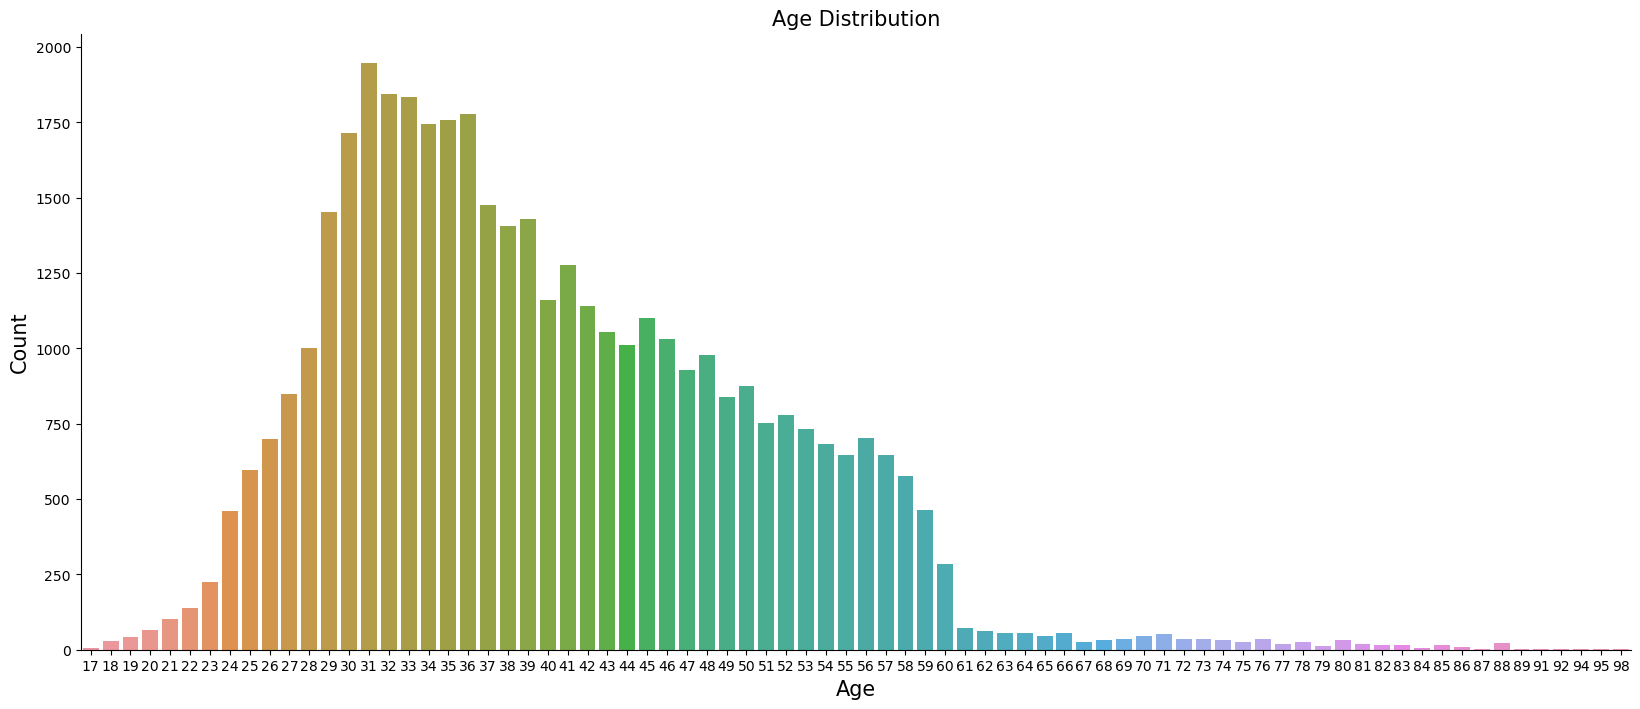

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = dfc)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()

In [19]:
# Define the age bins and labels
bins = [17, 27, 37, 47, 57, 67, 98]
labels = ['17-27', '27-37', '37-47', '47-57', '57-67', '67-98']

# Create a new column in the DataFrame with age groups
dfc['age_group'] = pd.cut(dfc['age'], bins=bins, labels=labels, right=False)


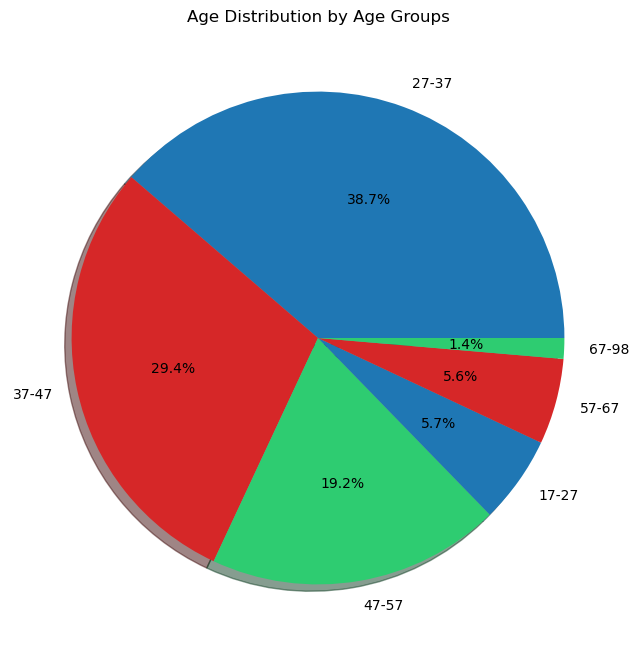

In [20]:
# Count the number of occurrences in each age group
age_group_counts = dfc['age_group'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, shadow = True, autopct = "%1.1f%%")
plt.title('Age Distribution by Age Groups')
plt.show()


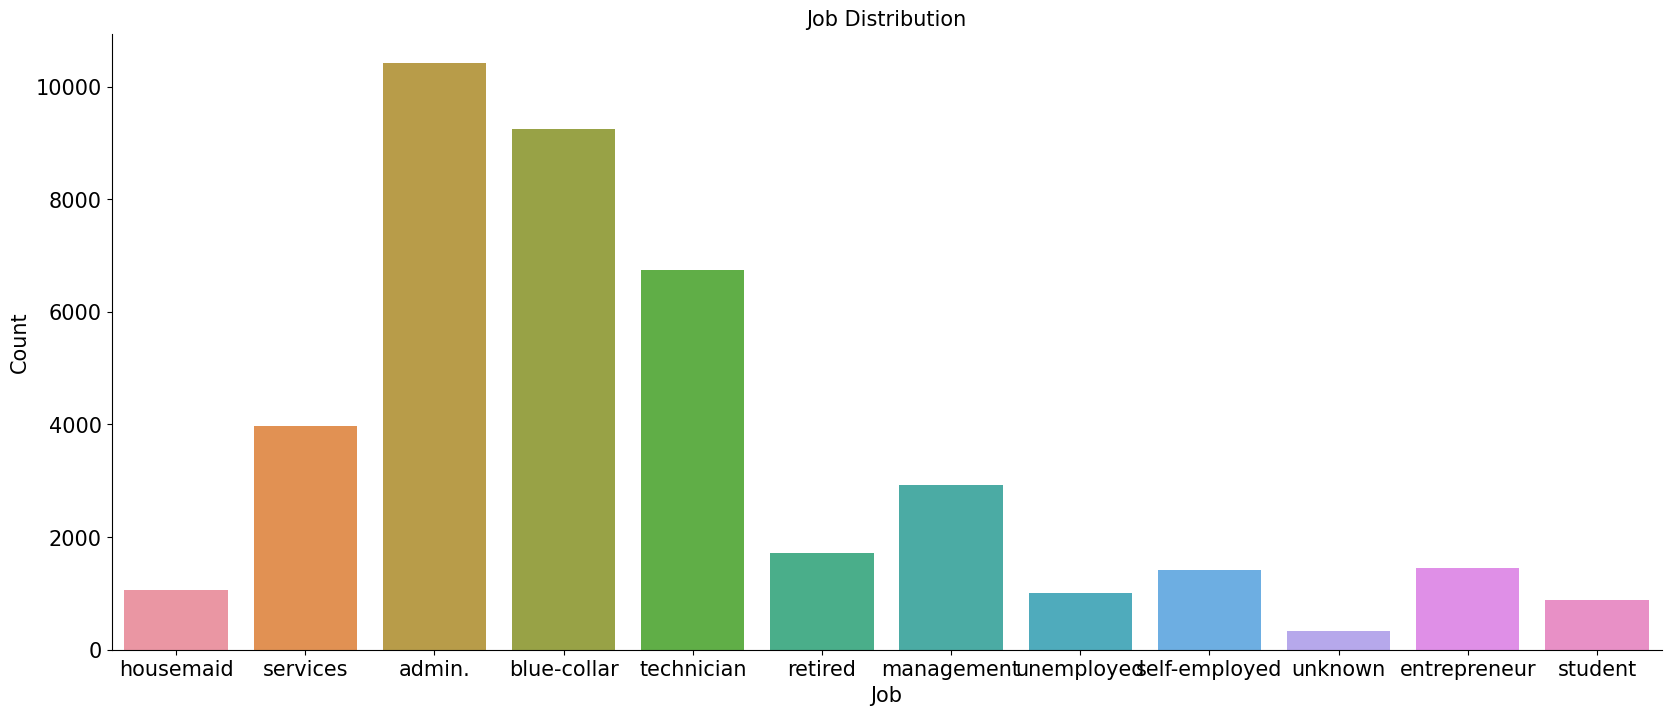

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = dfc)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

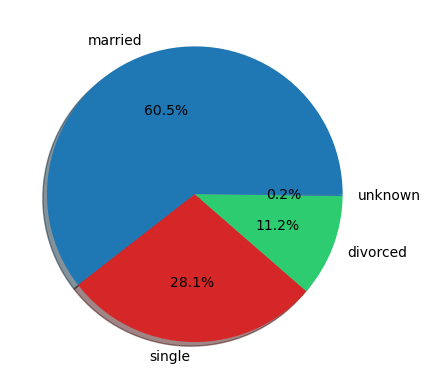

In [22]:
plt.pie(dfc['marital'].value_counts(), labels = dfc['marital'].value_counts().index, shadow = True, autopct = "%1.1f%%")
plt.show()

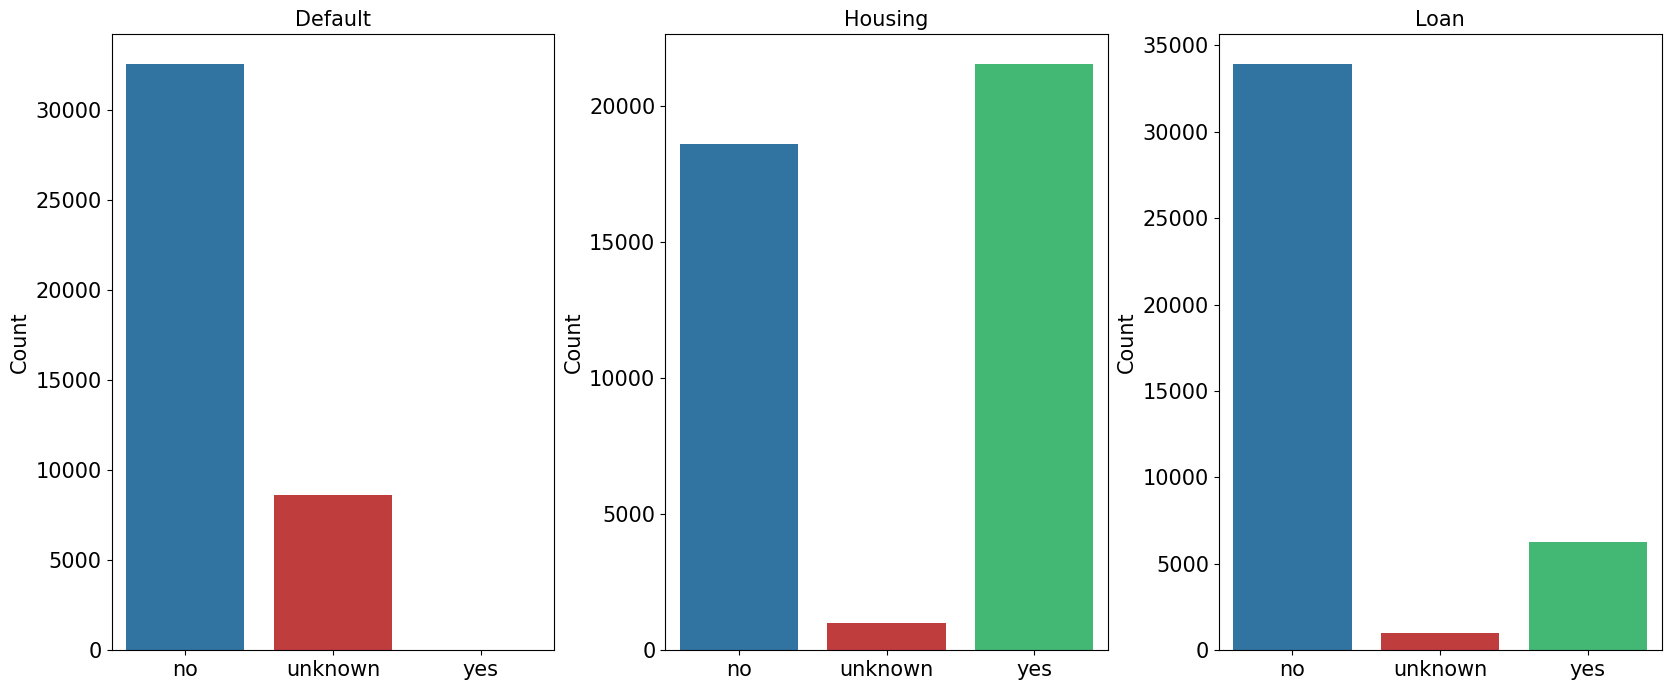

In [23]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = dfc, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = dfc, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = dfc, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

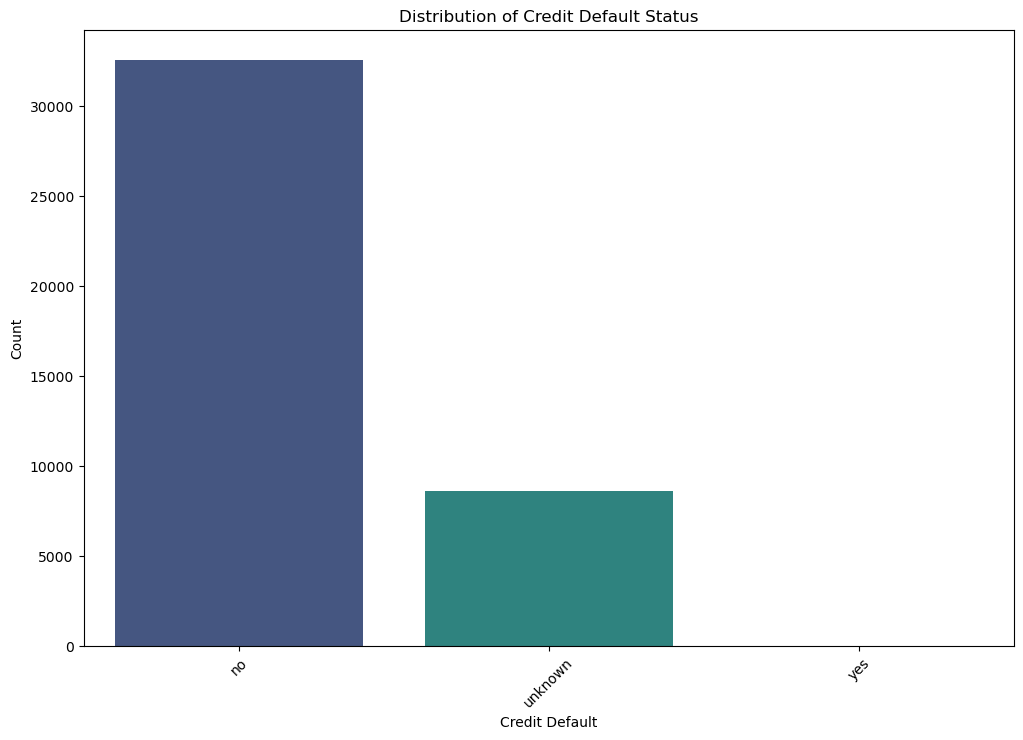

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(x='default', data=dfc, palette='viridis')
plt.title('Distribution of Credit Default Status')
plt.xlabel('Credit Default')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

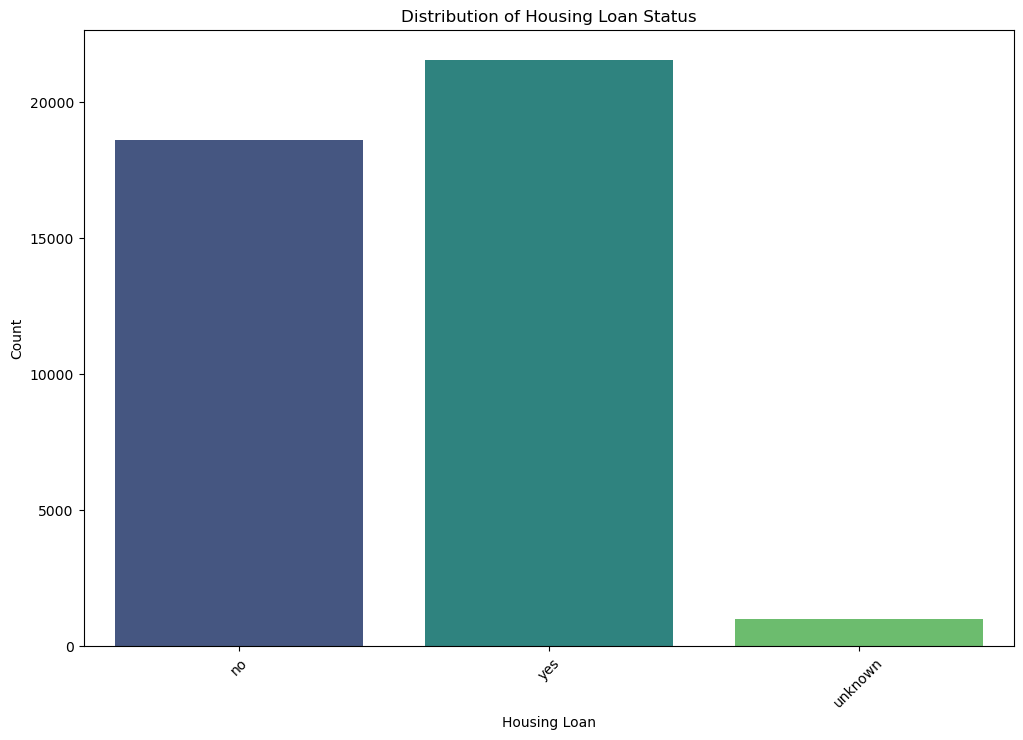

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(x='housing', data=dfc, palette='viridis')
plt.title('Distribution of Housing Loan Status')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

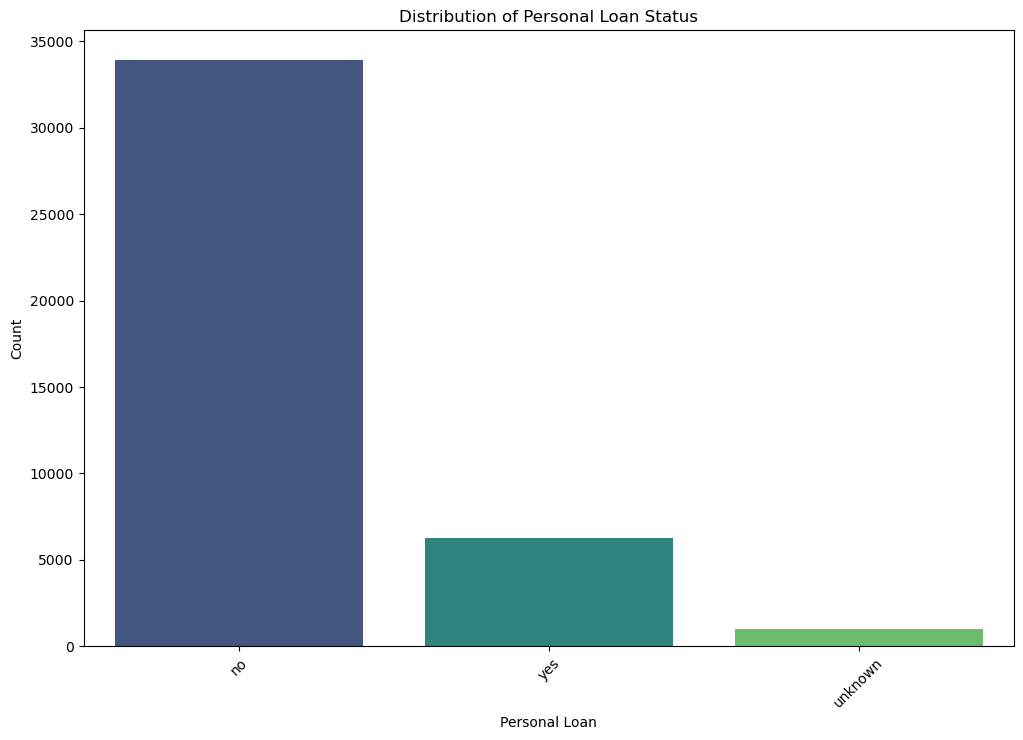

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(x='loan', data=dfc, palette='viridis')
plt.title('Distribution of Personal Loan Status')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

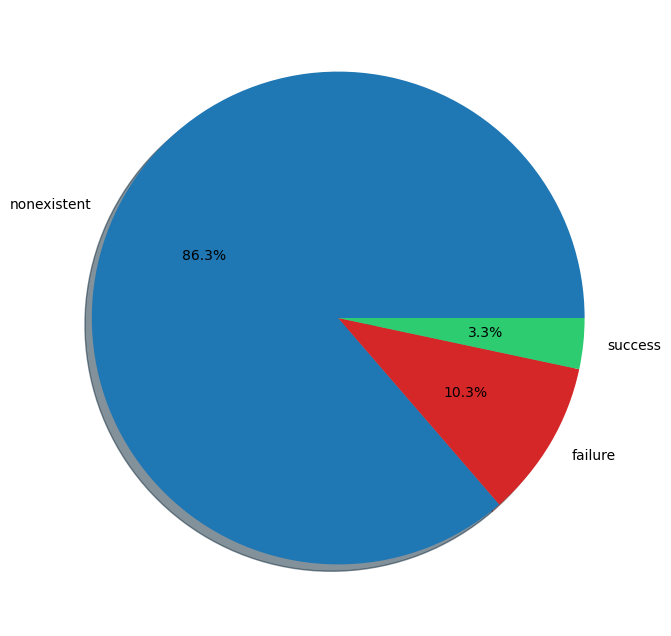

In [27]:
plt.figure(figsize=(12, 8))

plt.pie(dfc['poutcome'].value_counts(), labels = dfc['poutcome'].value_counts().index, shadow = True, autopct = "%1.1f%%")
plt.show()

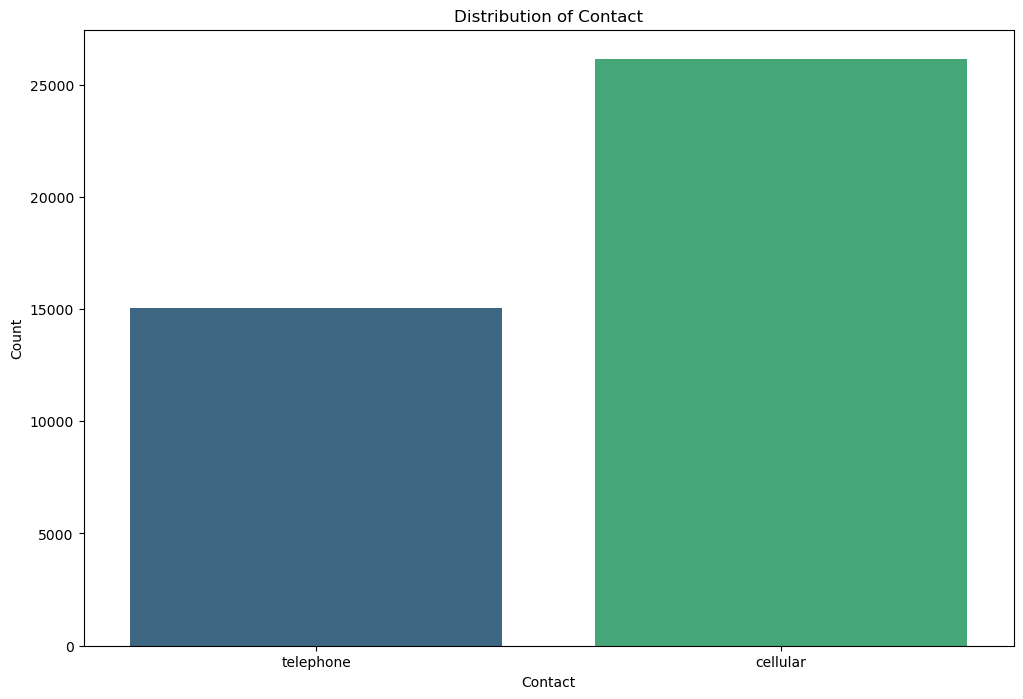

In [28]:
plt.figure(figsize=(12, 8))
sns.countplot(x='contact', data=dfc, palette='viridis')
plt.title('Distribution of Contact')
plt.xlabel('Contact')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

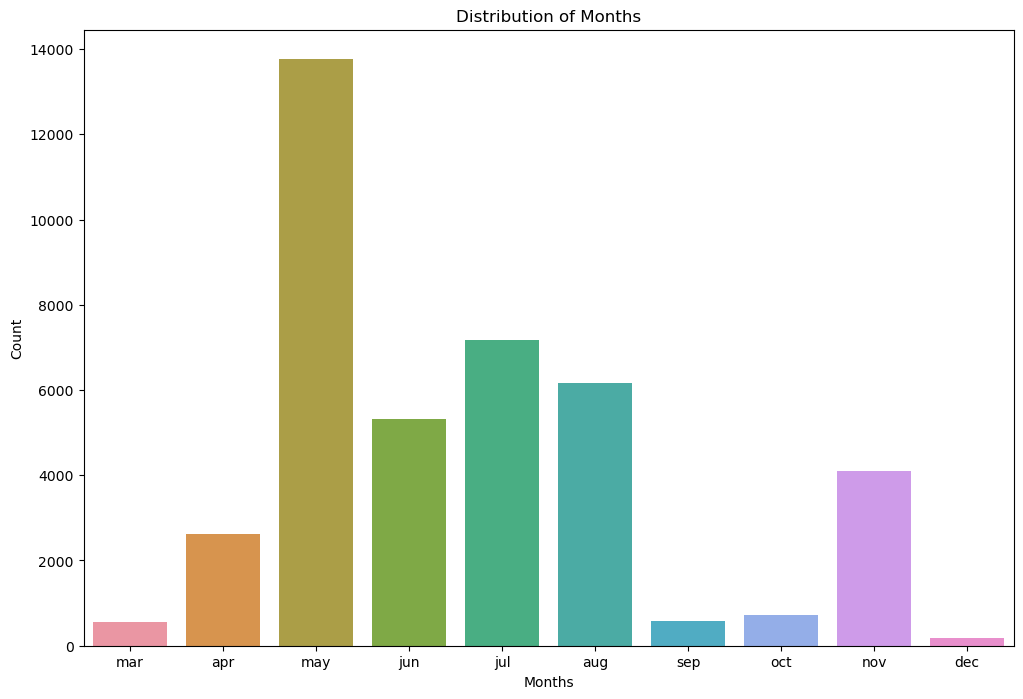

In [29]:
plt.figure(figsize=(12, 8))
sns.countplot(x='month', data=dfc, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Distribution of Months')
plt.xlabel('Months')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

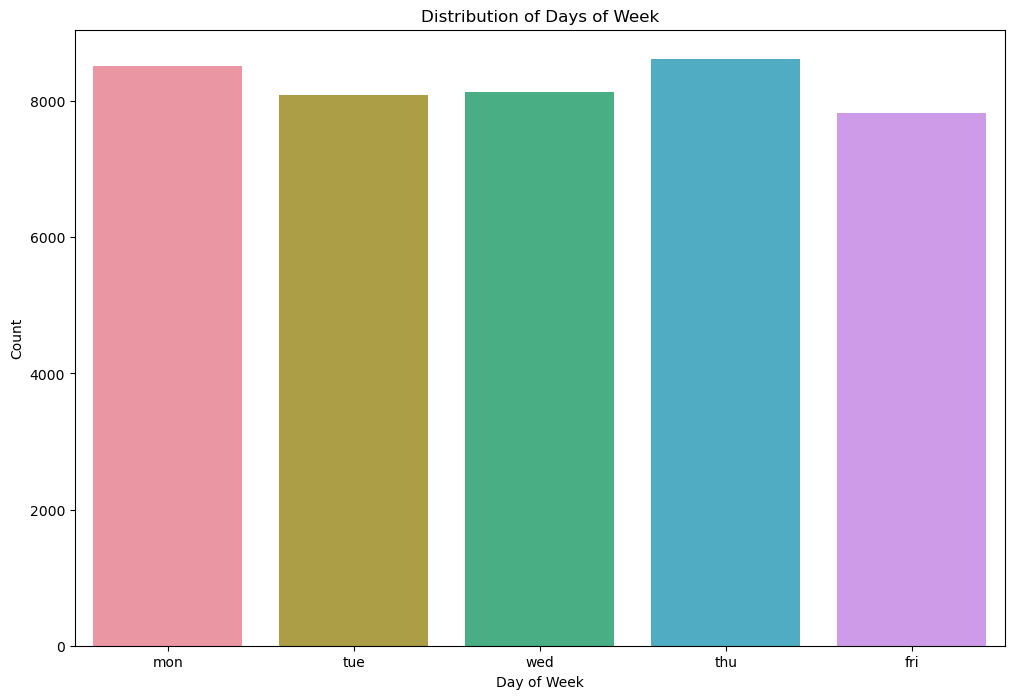

In [30]:
plt.figure(figsize=(12, 8))
sns.countplot(x='day_of_week', data=dfc)
plt.title('Distribution of Days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

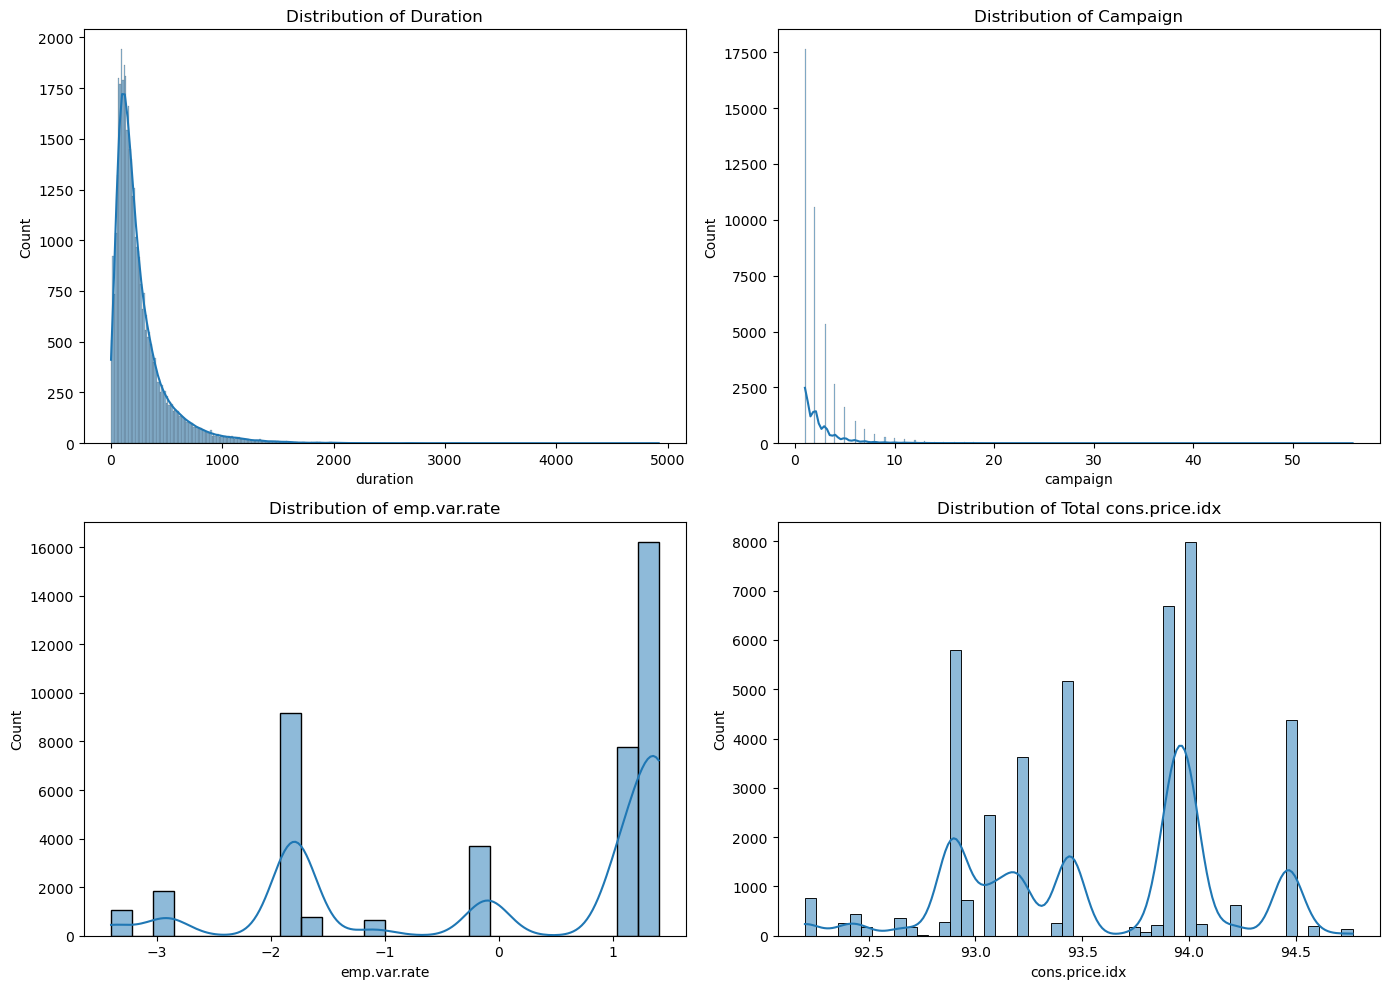

In [31]:
# Plotting the distribution of numerical features
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['duration'], kde=True)
plt.title('Distribution of Duration')

plt.subplot(2, 2, 2)
sns.histplot(df['campaign'], kde=True)
plt.title('Distribution of Campaign')

plt.subplot(2, 2, 3)
sns.histplot(df['emp.var.rate'], kde=True)
plt.title('Distribution of emp.var.rate')

plt.subplot(2, 2, 4)
sns.histplot(df['cons.price.idx'], kde=True)
plt.title('Distribution of Total cons.price.idx')

plt.tight_layout()
plt.show()

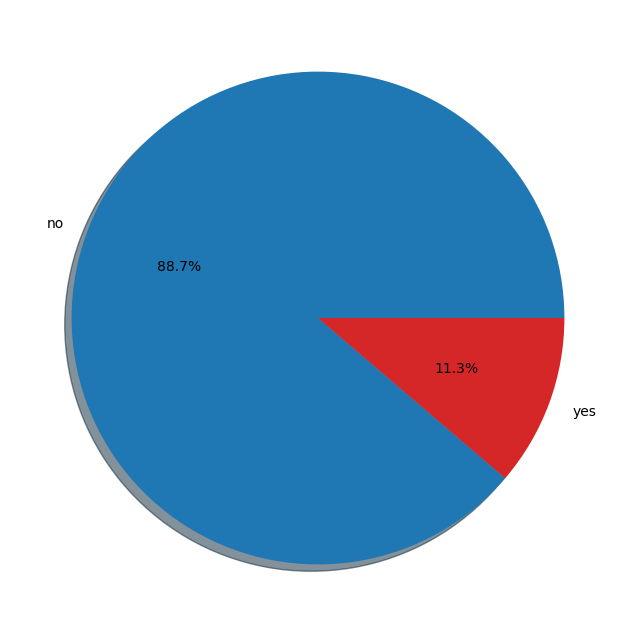

In [32]:
plt.figure(figsize=(12, 8))

plt.pie(dfc['y'].value_counts(), labels = dfc['y'].value_counts().index, shadow = True, autopct = "%1.1f%%")
plt.show()

## Bivariate Analysis

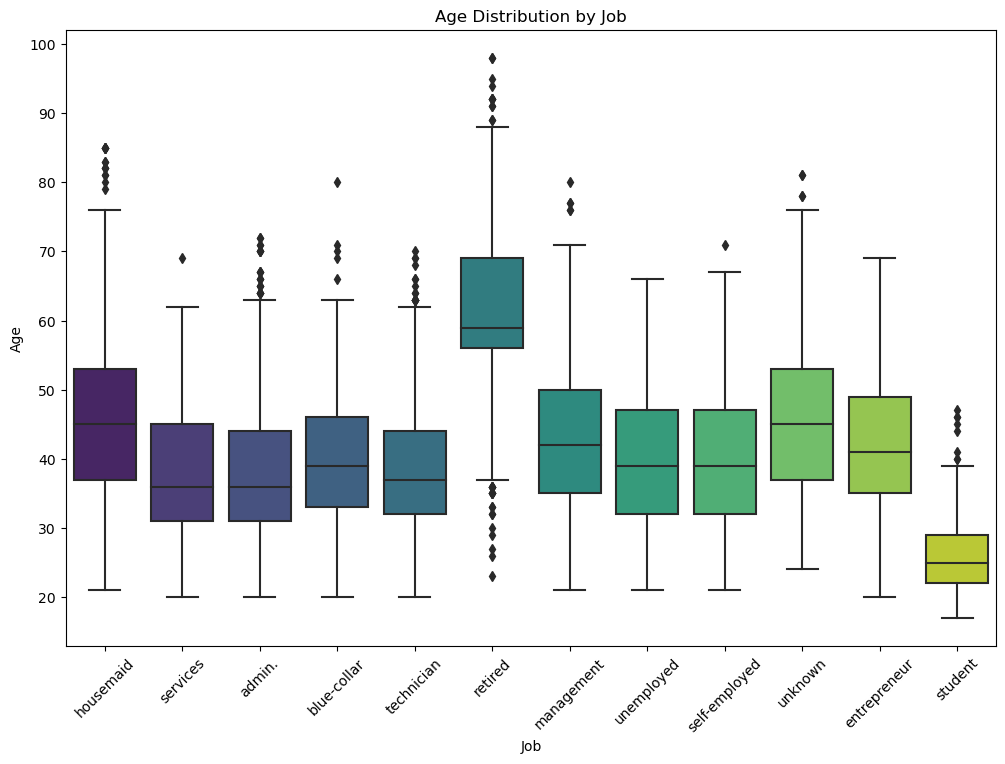

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='job', y='age', data=dfc, palette='viridis')
plt.title('Age Distribution by Job')
plt.xlabel('Job')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

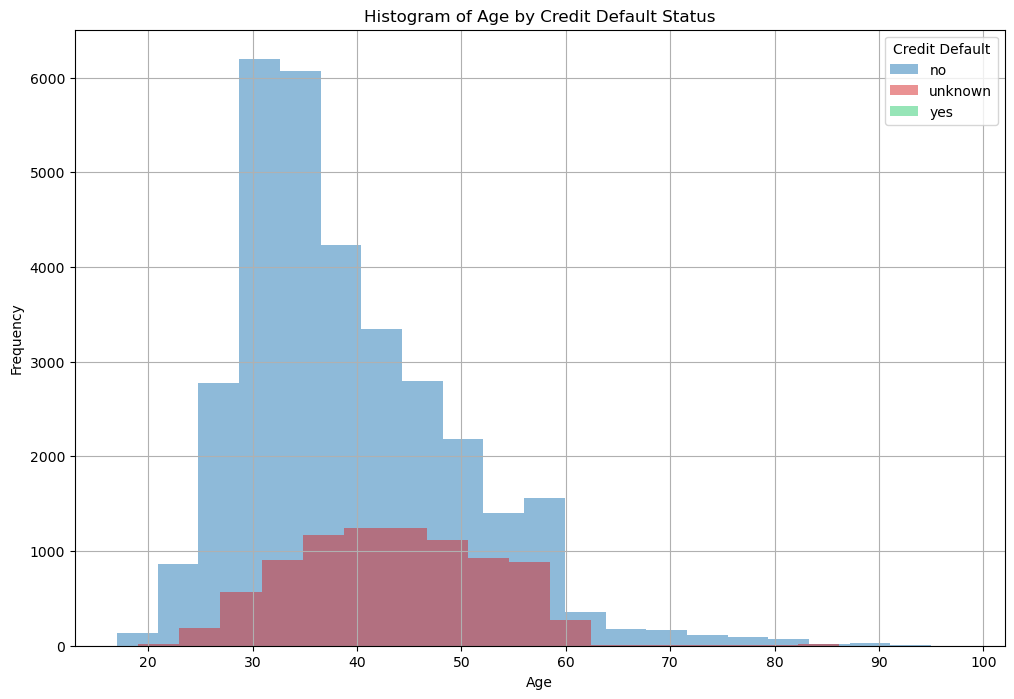

In [34]:
plt.figure(figsize=(12, 8))
for default in dfc['default'].unique():
    subset = dfc[dfc['default'] == default]
    plt.hist(subset['age'], bins=20, alpha=0.5, label=default)

plt.title('Histogram of Age by Credit Default Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Credit Default')
plt.grid(True)
plt.show()

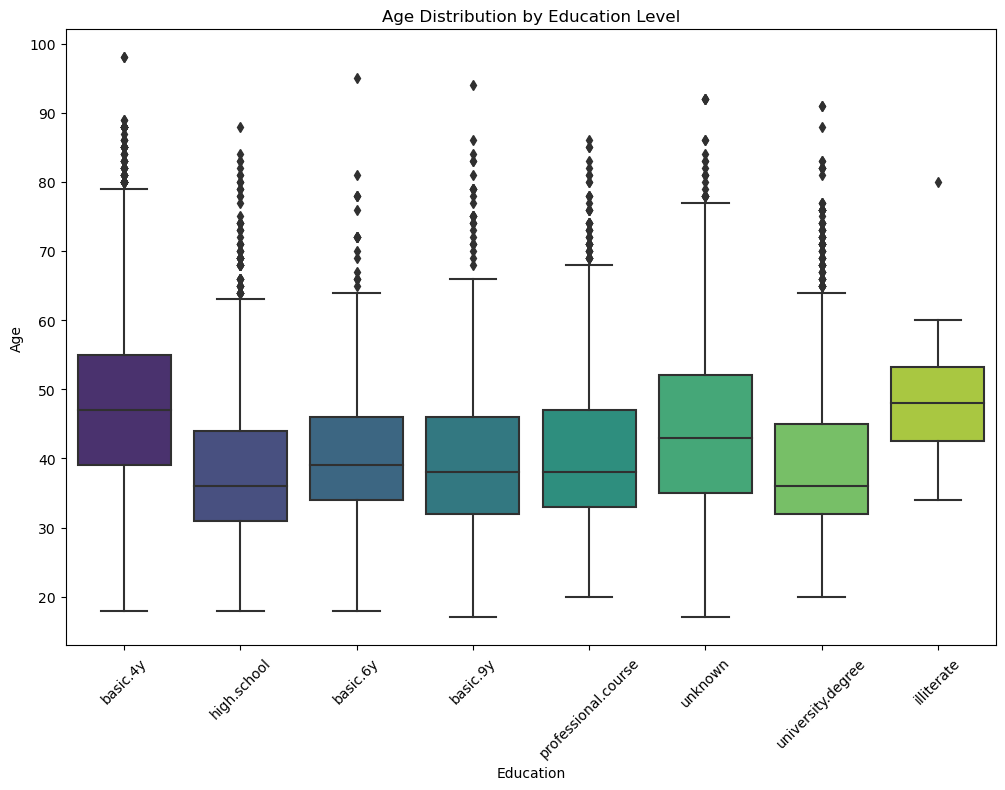

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='education', y='age', data=dfc, palette='viridis')
plt.title('Age Distribution by Education Level')
plt.xlabel('Education')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


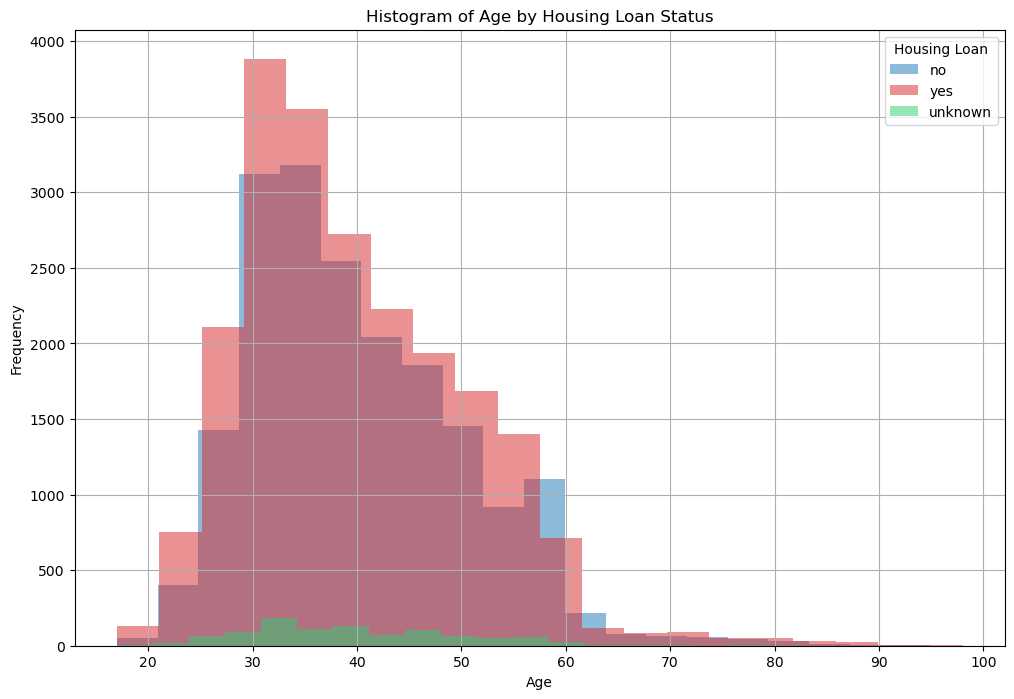

In [36]:
plt.figure(figsize=(12, 8))
for housing in dfc['housing'].unique():
    subset = dfc[dfc['housing'] == housing]
    plt.hist(subset['age'], bins=20, alpha=0.5, label=housing)

plt.title('Histogram of Age by Housing Loan Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Housing Loan')
plt.grid(True)
plt.show()

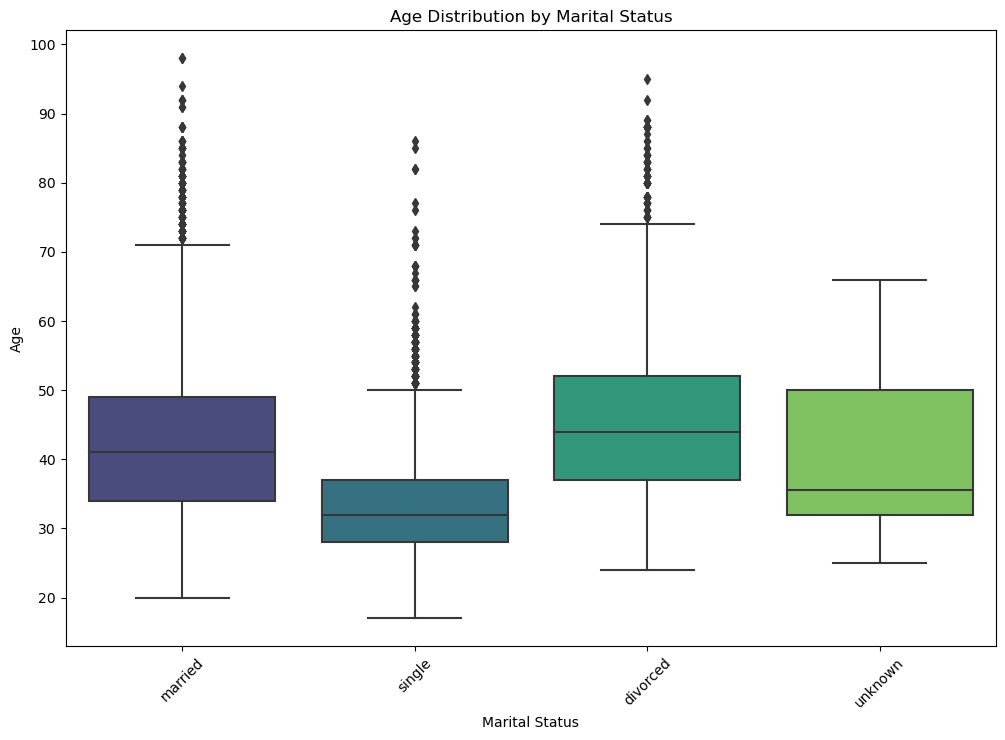

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='marital', y='age', data=dfc, palette='viridis')
plt.title('Age Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


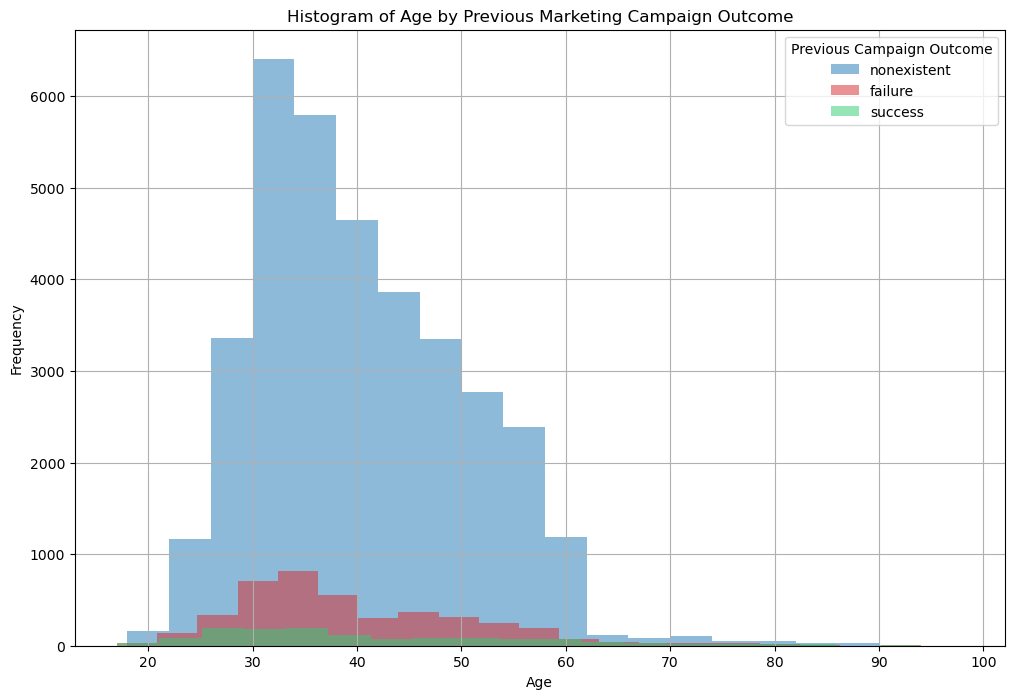

In [38]:
plt.figure(figsize=(12, 8))
for poutcome in dfc['poutcome'].unique():
    subset = dfc[dfc['poutcome'] == poutcome]
    plt.hist(subset['age'], bins=20, alpha=0.5, label=poutcome)

plt.title('Histogram of Age by Previous Marketing Campaign Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Previous Campaign Outcome')
plt.grid(True)
plt.show()

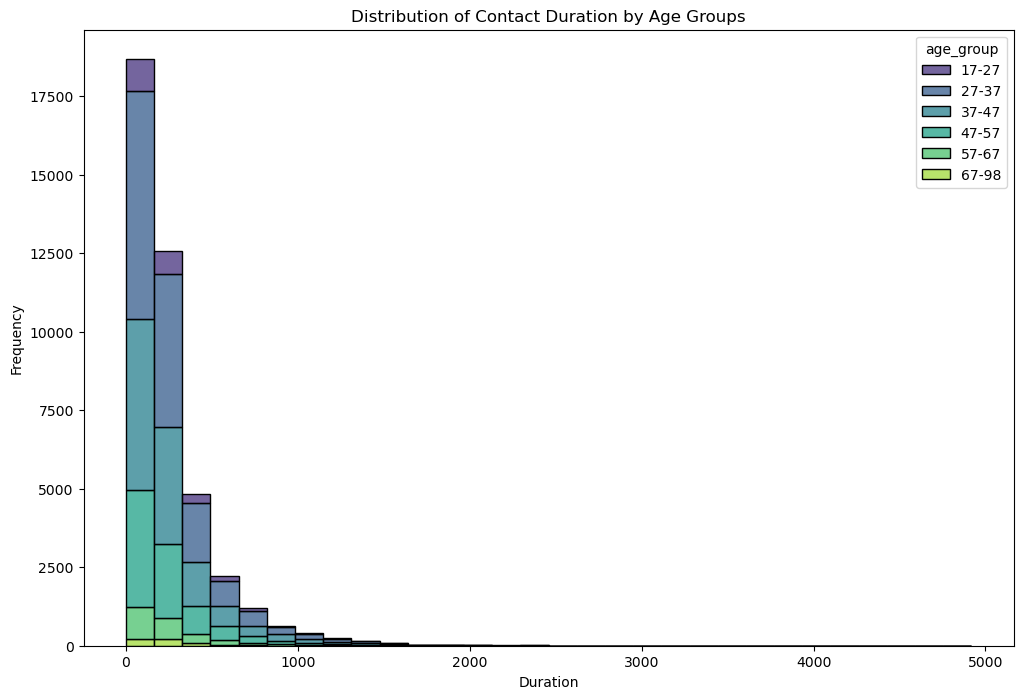

In [39]:
plt.figure(figsize=(12, 8))
sns.histplot(data=dfc, x='duration', hue='age_group', multiple='stack', palette='viridis', bins=30)
plt.title('Distribution of Contact Duration by Age Groups')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

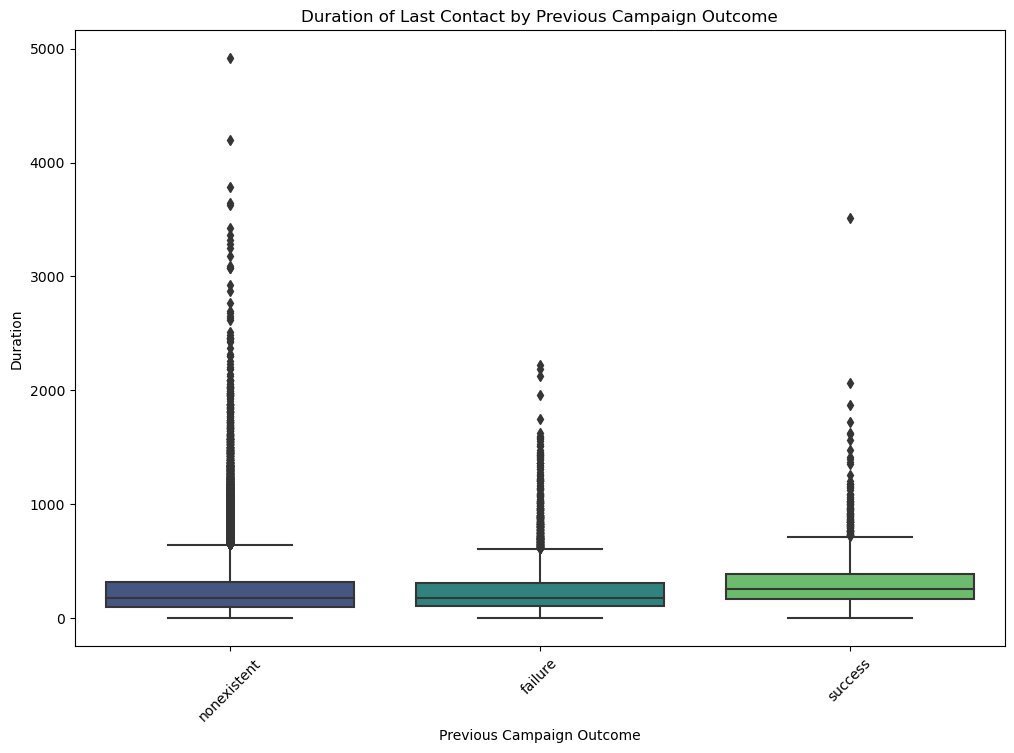

In [40]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='poutcome', y='duration', data=dfc, palette='viridis')
plt.title('Duration of Last Contact by Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.show()

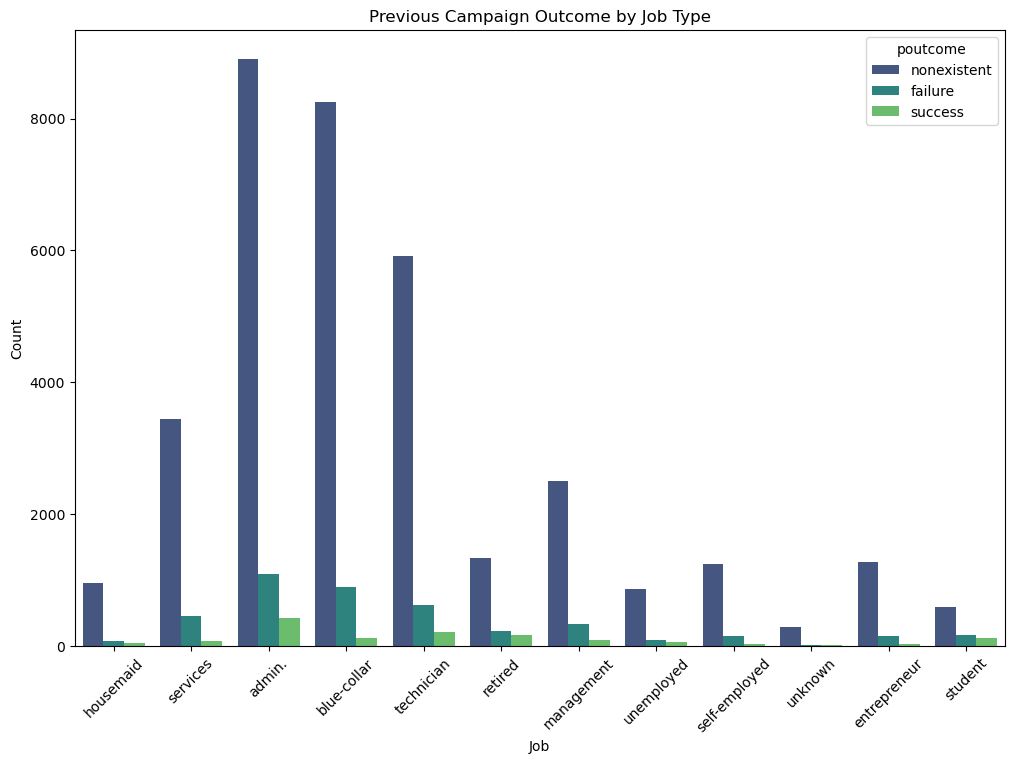

In [41]:
plt.figure(figsize=(12, 8))
sns.countplot(x='job', hue='poutcome', data=dfc, palette='viridis')
plt.title('Previous Campaign Outcome by Job Type')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

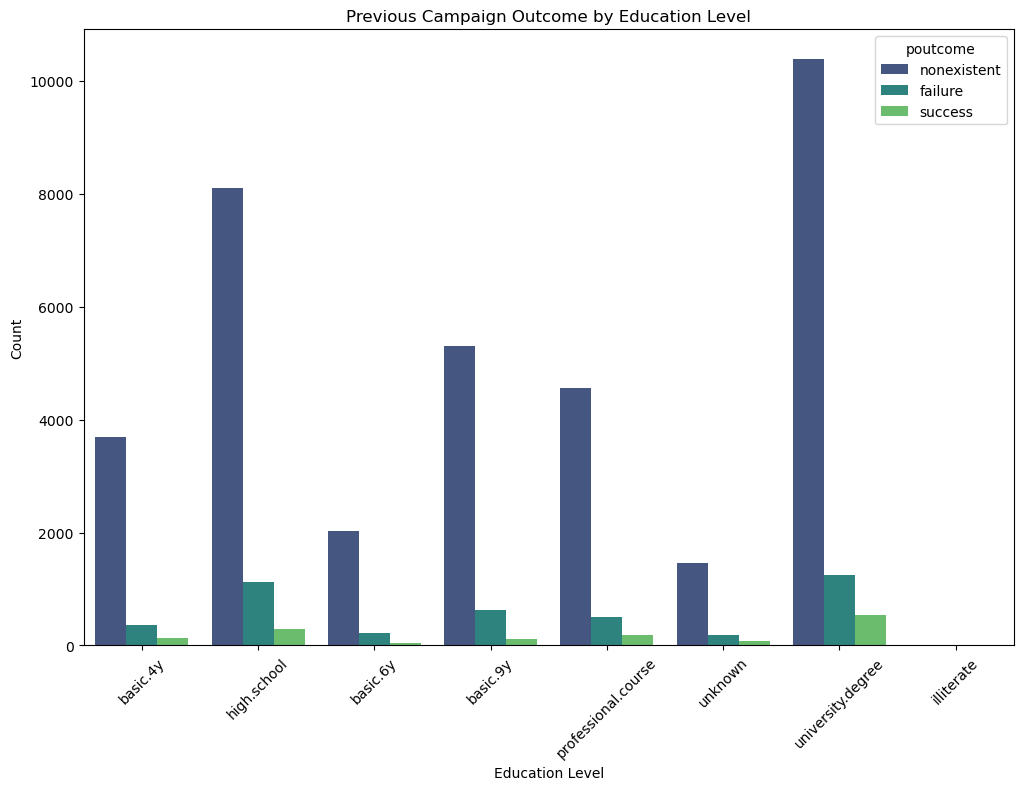

In [42]:
plt.figure(figsize=(12, 8))
sns.countplot(x='education', hue='poutcome', data=dfc, palette='viridis')
plt.title('Previous Campaign Outcome by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

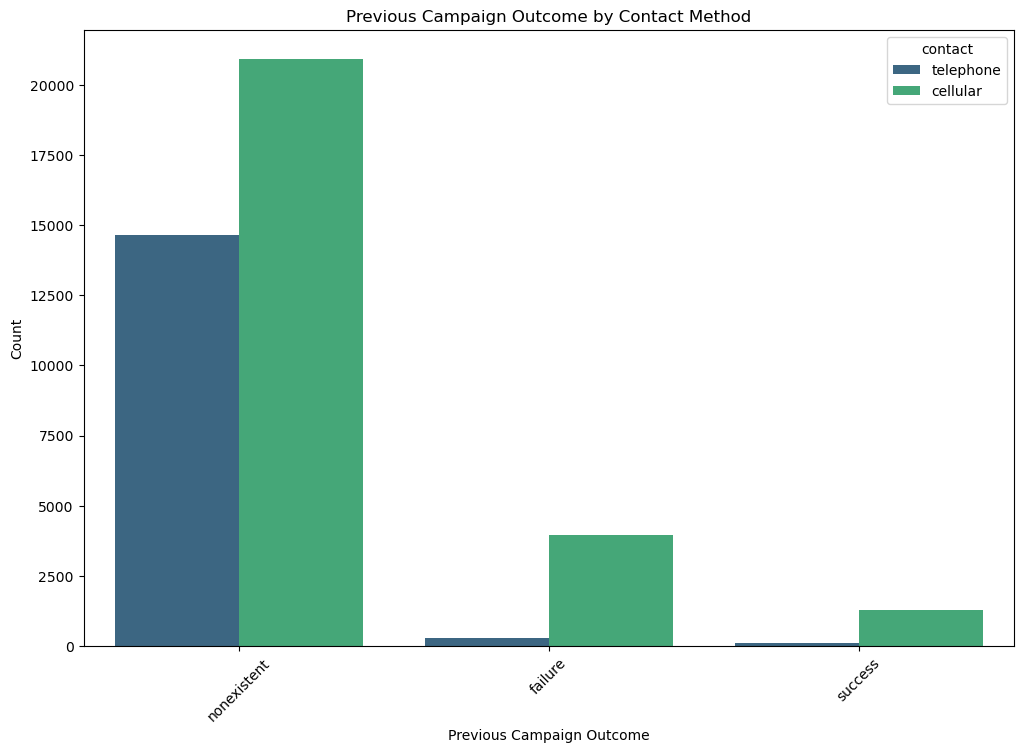

In [43]:
plt.figure(figsize=(12, 8))
sns.countplot(x='poutcome', hue='contact', data=dfc, palette='viridis')
plt.title('Previous Campaign Outcome by Contact Method')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

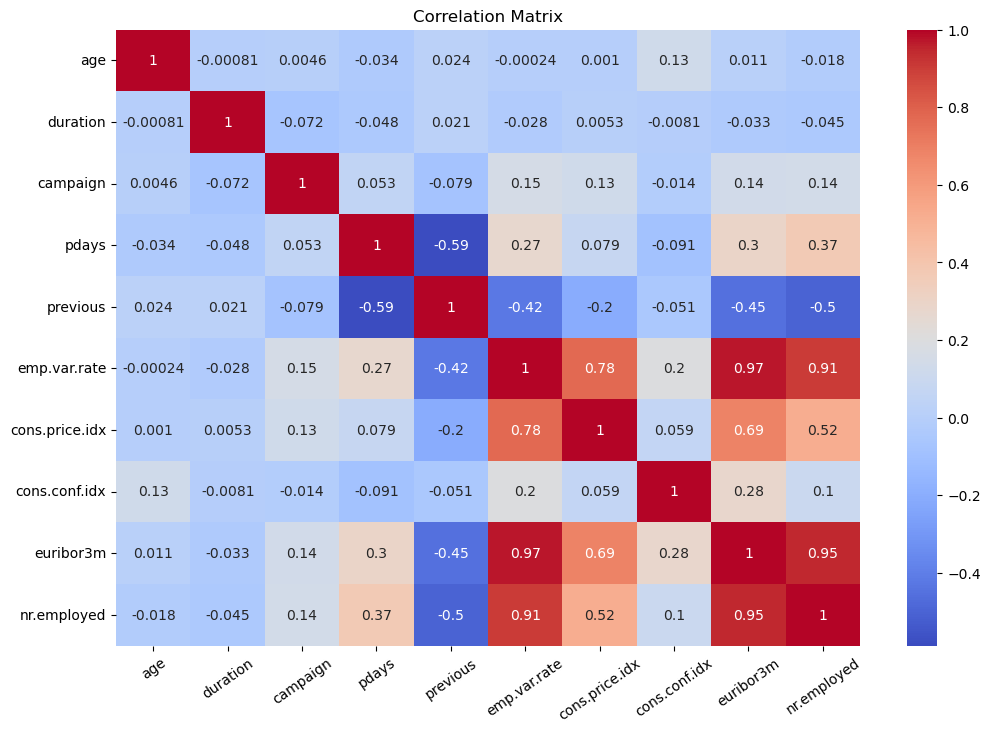

In [44]:
# Correlation matrix of numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(dfc.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=35)
plt.title('Correlation Matrix')
plt.show()

In [45]:
corr = dfc.corr()
corr_greater_than_75 = corr[corr>=.75]

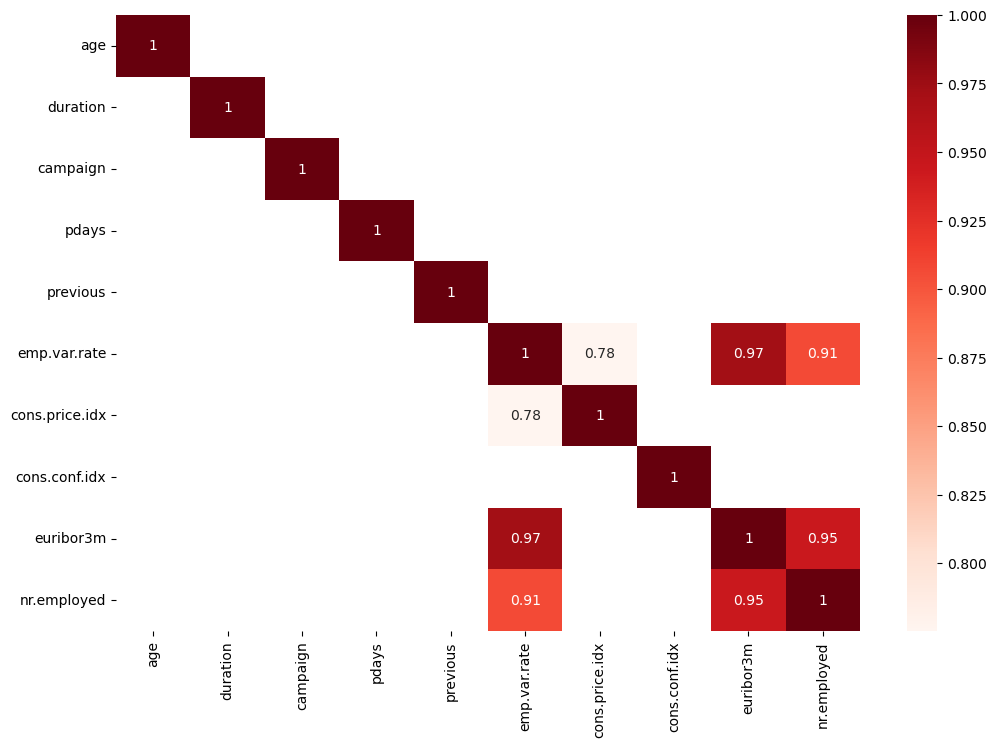

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_75, cmap="Reds", annot = True);

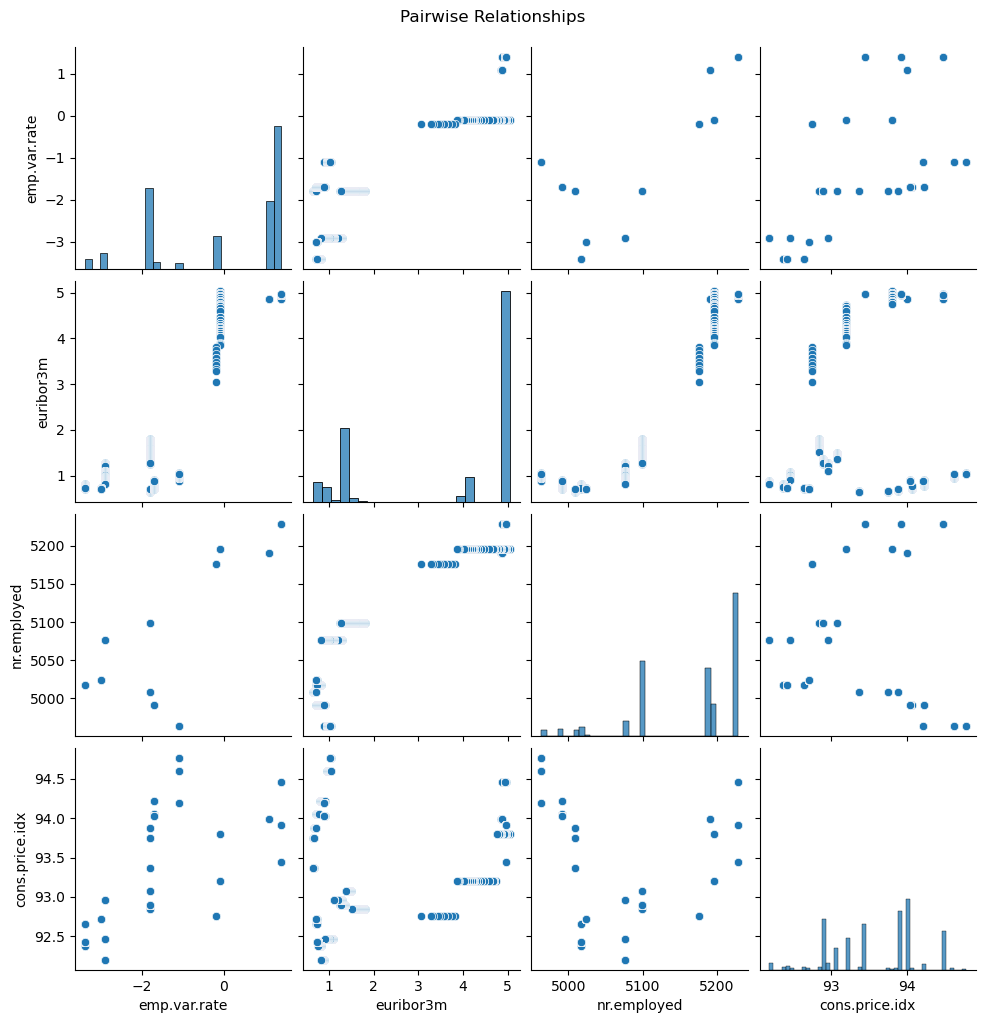

In [47]:
sns.pairplot(dfc, vars=['emp.var.rate','euribor3m','nr.employed','cons.price.idx'])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()